# Laboratory practice 2.2: KNN classification

Here we will implement our first ML model based on the _very_ popular KNN algorithm. We will use the preprocessed data from the previous practice, `SimData.dat`. The data should be properly cleaned already, and we should have available the two resulting files `train.dat` and `test.dat` with the training and testing data, respectively. Therefore, we will not need to do the preprocessing here, which is why we will (almost) jump to implementing KNN and applying it to the data.

In [1]:
# Load the modules you'll need later

# Plotting libraries
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
sns.set_theme()

# Data management libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Add Lab_2_2_kNN.py to the path
import sys
import os 
#sys.path.append('../src')

# Agregar el directorio "src" al path de Python
sys.path.append(os.path.abspath("../src"))

# Import the functions from the solution
#from P2_2_LogReg_KNN_solution import knn, plot_probability_histograms, plot_roc_curve, evaluate_classification_metrics, plot_2Dmodel_predictions, plot_calibration_curve
from Lab_2_2_kNN import knn , plot_probability_histograms, plot_roc_curve, evaluate_classification_metrics, plot_2Dmodel_predictions, plot_calibration_curve


## 1. Prepare the Dataset

This part of the process you already did in the previous practice! You can reuse everything here. Moreover, if you saved the train/test split into `train.dat` and `test.dat`, you can use them here!

In [2]:

# Load the train and test data you generated (use the name "train_df" and "test_df")

# Ruta relativa desde "notebook" al directorio raíz
test_df = pd.read_csv("../test.dat", delimiter="\t")  
train_df = pd.read_csv("../train.dat", delimiter="\t")
print(train_df)
print(test_df)
# Convert output variable to factor

train_df["X1"] = train_df["X1"].astype(float)
train_df["X2"] = train_df["X2"].astype(float)
test_df["X1"] = test_df["X1"].astype(float)
test_df["X2"] = test_df["X2"].astype(float)

train_df["Y"] = train_df["Y"].astype(bool)
test_df["Y"] = test_df["Y"].astype(bool)



           X1        X2  Y
0   -0.105279 -0.429169  0
1    0.565701  1.460673  0
2   -0.542629  1.143219  0
3   -1.374014  1.074043  0
4   -0.685081  1.785181  0
..        ...       ... ..
791  1.837347  1.038488  1
792 -2.140971  0.922152  1
793 -0.326279 -0.575761  1
794  0.563289  1.454189  0
795 -0.628862 -0.618438  0

[796 rows x 3 columns]
           X1        X2  Y
0    1.280887 -0.819017  1
1   -0.375451  0.324615  0
2   -1.180180  1.094020  0
3    0.851516  0.842751  0
4    1.194352  1.038517  0
..        ...       ... ..
195 -0.711147 -0.345476  1
196 -1.943922 -0.017562  1
197 -0.766587  1.602834  0
198  1.669122 -0.554176  1
199  0.169274 -0.603450  0

[200 rows x 3 columns]


In [3]:
# Define input and output variables, and store X_train, X_test, y_train and y_test matrices
input_vars = ['X1','X2']
target_var = 'Y'

X_train = train_df[input_vars]
y_train = train_df[target_var]
X_test = test_df[input_vars]
y_test = test_df[target_var]

## 2. Training of Machine Learning models

#### Minkowski Distance

<center>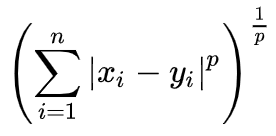</center>

#### k-Nearest Neighbors Model

- [K-Nearest Neighbours](https://scikit-learn.org/stable/modules/neighbors.html#classification)
- [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [4]:
# Inputs of the model. Change accordingly to perform feature selection
INPUTS_KNN = input_vars

# Define hyperparameters of the model
k = 31 # Number of nearest neighbors
p = 2 # Order of Minkowski distance (what distance is this?)

# Create a model object
knn_fit = knn()
print(knn_fit) #vemos que de momento está vacío -> llamamos a la función "fit" para pasarlo los parámetros 

kNN model (k=None, p=None)


In [5]:

print (np.unique(y_train.values))

[False  True]


In [6]:
# Train model
try : 
    knn_fit.fit(X_train[INPUTS_KNN].values, y_train.values, k=k, p=p)
    print("kNN Trained")
    print(knn_fit)
except ValueError as error: 
    print (error)


kNN Trained
kNN model (k=31, p=2)


Vemos que tenemos ya el modelo definido, en el que haremos KNN con 31 vecinos, los cuales se calcularán mediante la funcion de distancia de grado 2 . 

In [7]:
for i in range(5):  
    print(f"Vecinos más cercanos para la muestra {i}:")
    print(knn_fit.find_nearest_kneighours(X_train[INPUTS_KNN].values[i]))

Vecinos más cercanos para la muestra 0:
[(0.0, False), (0.0803146615355089, False), (0.08531441788298584, False), (0.08834951457332835, False), (0.11546400120447968, False), (0.12723122711056103, False), (0.1604966850011686, False), (0.1755192321486371, False), (0.18301803091859228, False), (0.20424024775686, False), (0.2197680060276736, False), (0.2269005947080328, True), (0.2302679435034196, False), (0.23229079128182545, False), (0.24099680022515, False), (0.2434573727821278, False), (0.24394640122167946, False), (0.24491731592188357, True), (0.2519064028321023, False), (0.25495890009301003, True), (0.2651994515650646, True), (0.2693160655156287, False), (0.27295022301414873, False), (0.2847069458771612, False), (0.28952116627945707, False), (0.29617006845088717, False), (0.29843850225660634, False), (0.3300428086606746, False), (0.33350896801085744, False), (0.3434578740504717, False), (0.34796422547763955, False)]
Vecinos más cercanos para la muestra 1:
[(0.0, False), (0.0069185340

Probando la funcion de los vecinos cercanos que he creado aparte, podemos ver que dan vecinos diferentes, ordenados según la menor distancia, por lo que vemos que funciona

In [8]:
probs = knn_fit.predict_proba(X_train[INPUTS_KNN].values)
print("Distribución de probabilidades:")
print(probs[:10]) 


Distribución de probabilidades:
[[0.87096774 0.12903226]
 [1.         0.        ]
 [1.         0.        ]
 [0.67741935 0.32258065]
 [1.         0.        ]
 [0.03225806 0.96774194]
 [0.32258065 0.67741935]
 [0.03225806 0.96774194]
 [0.06451613 0.93548387]
 [0.38709677 0.61290323]]


In [9]:
# Verificar valores de probs en la malla antes de graficar
print("Probabilidades en la malla (primeros 10 valores):\n", probs.ravel()[:10])


Probabilidades en la malla (primeros 10 valores):
 [0.87096774 0.12903226 1.         0.         1.         0.
 0.67741935 0.32258065 1.         0.        ]


In [10]:
print("Valores únicos de probs en la malla:", np.unique(probs))


Valores únicos de probs en la malla: [0.         0.03225806 0.06451613 0.09677419 0.12903226 0.16129032
 0.19354839 0.22580645 0.25806452 0.29032258 0.32258065 0.35483871
 0.38709677 0.41935484 0.4516129  0.48387097 0.51612903 0.5483871
 0.58064516 0.61290323 0.64516129 0.67741935 0.70967742 0.74193548
 0.77419355 0.80645161 0.83870968 0.87096774 0.90322581 0.93548387
 0.96774194 1.        ]


Vemos que , en principio, las probabilidades estimadas pueden ser correctas, dando saltos no muy grandes 

 datos predecidos


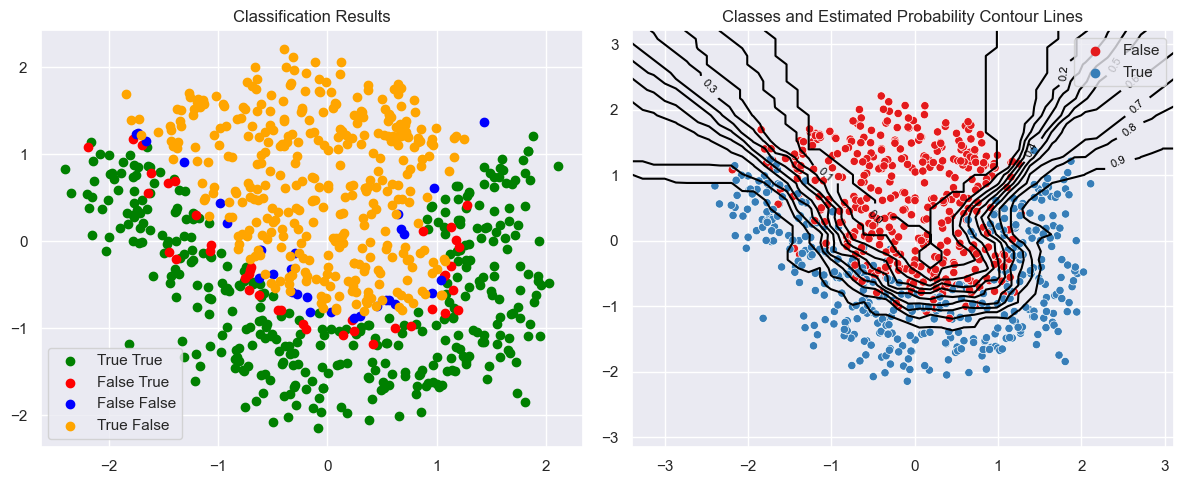

In [11]:
model_predictions = plot_2Dmodel_predictions(X_train[INPUTS_KNN].values, y_train.values, knn_fit, 50)

Nos interesa que el modelo mida el máximo porcentaje de datos verdes y amarillos. Vemos que los amarillos están (los 0 verdaderos) están en el centro, y los verdes a los lados. Esto provoca que el modelo se confunda en las zonas de abajo y en las fronteras entre los 1 y los 0. 

Por eso, en los laterales el modelo están más seguro de que los datos son de la clase 1, pero cuanto más al centro más incertidumbre tiene. 

Esto se debe a que los datos están muy centrados en zonas muy concretas, y por eso aquellos datos que se alejan de esas zonas son más complicados de medir. Podríamos solucionar esto añadiendo más datos 

In [12]:
# Obtain train performance metrics
evaluate_classification_metrics(y_train, knn_fit.predict(X_train[INPUTS_KNN].values), True)

{'Confusion Matrix': [360, 40, 30, 366],
 'Accuracy': 0.9120603015075377,
 'Precision': 0.9014778325123153,
 'Recall': 0.9242424242424242,
 'Specificity': 0.9,
 'F1 Score': 0.912718204488778}

Vemos que , empleando los datos del training, el modelo lee mucho más datos correctos que incorrectos, por lo que nos indica que estamos alcanzando un buen modelo. 

Por lo general, vemos que tiene buena sensibilidad y precisión, lo que hace un buen modelo. SIn embargo, habría que mejorar el recall. Comparando el recall con la specifity, vemos que el modelo , en caso de duda, suele clasificiar el dato como negativo. 


In [13]:
# Obtain test performance metrics
evaluate_classification_metrics(y_test, knn_fit.predict(X_test[INPUTS_KNN].values),  True)

{'Confusion Matrix': [85, 12, 13, 90],
 'Accuracy': 0.875,
 'Precision': 0.8823529411764706,
 'Recall': 0.8737864077669902,
 'Specificity': 0.8762886597938144,
 'F1 Score': 0.8780487804878048}

Evaluando el modelo en los datos del testing, vemos que sigue un poco el mismo patrón, alcanzando una precisión parecida a los datos del test. Esto nos puede indicar que el modelo estima igual de bien los datos que no ha visto nunca, con respecto a los que ha empleado para crear el modelo. 

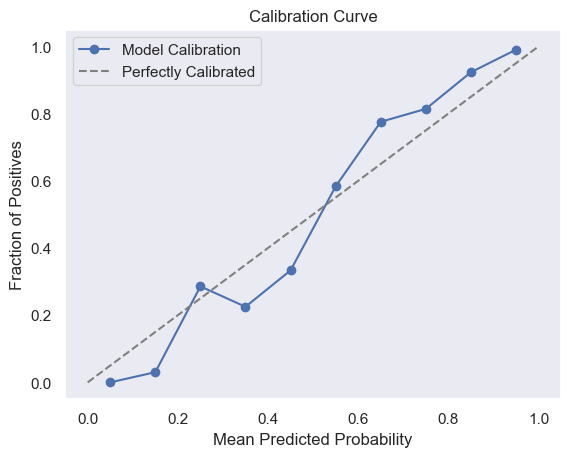

In [14]:
calibration_curve = plot_calibration_curve(y_train.values, probs[:,1], True)

Vemos que las probabilidades alcanzadas, auque hay cierto error, tiene una tendencia parecida a una perfectamente calibrada, lo que nos indica un parámetro más para ver cómo de bueno es nuestro modelo. 

En un análisis simple, podríamos decir que en general el modelo le atribuye una probabilidad demasiado baja a los valores positivos, lo que hace que se desvíe de la perfección. 

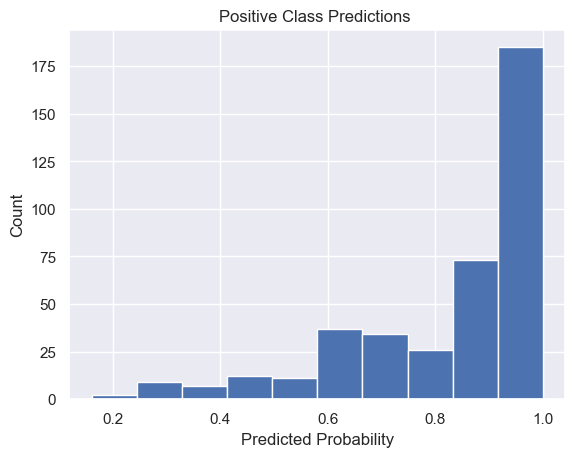

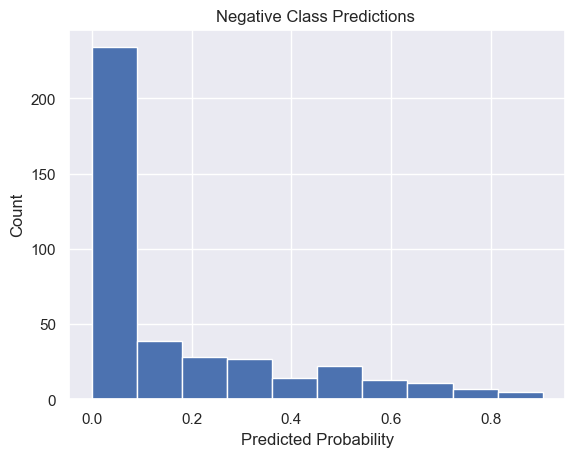

In [15]:
probability_histograms = plot_probability_histograms(y_train.values, probs[:,1], True)

Para ser perfecto, el histograma deberia medir la mayor parte de los datos de la clase 1 en probabilidades de 1, y en 0 a los negativos. 

Viendo ambos histogramas, podemos ver que esta tendencia sí se cumple. Con probabilidad de casi 0, el modelo lee erróneamente los falsos como verdaderos. Por otro lado, la probabilidad de que el modelo lea un 1 , siendo el dato un 1, es casi perfecta. Esto nos indica que, anque existe cierto error debido a la cola de la distribución, el modelo funciona bien para un gran porcentaje de los datos. 

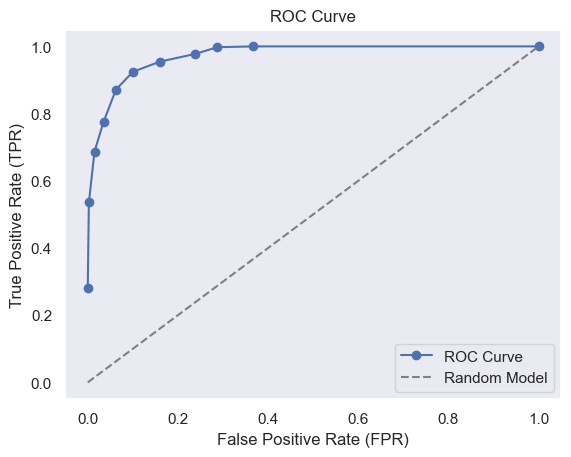

In [16]:
roc_curve = plot_roc_curve(y_train.values, probs[:,1], True)

Por último, podemos ver mediante la curva ROC que , aunque no es un modelo perfecto, estamos creando uno suficientemente bueno para tener cierta precisión . Para ser perfecto, debería estar cuando más cerca del 1 posible. Sabiendo eso, vemos que es considerablemente mejor que el modelo al azar, pero hay mucha cabida a mejora. 